# IMPORT LIBRARY

- Google Colab supaya dapat mengoperasikan colab lebih bebas.
- Pandas untuk mengoperasikan pandas data frame.
- RE untuk mencocokkan penulisan yang ditampilkan dengan ekspresi yang diinginkan seperti karakter, operator ataupun konstruksi.
- NLTK (Natural Language Tool Kit) untuk memproses teks seperti melakukan classification, tokenization, stemming, tagging, parsing, dan semantic reasoning.
- Warning untuk menonaktifkan peringatan yang kurang berguna seperti penulisan yang lebih baik atau rekomendasi function dan method pada versi yang lebih baru.
- TextBlob untuk melakukan berbagai proses terhadap data teks seperti tokenisasi (pemotongan kata), analisa sentiment.

In [1]:
from google.colab import files, output

import tweepy
import sys
import csv

import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob

import warnings

warnings.filterwarnings('ignore')
print("Semua library yang dibutuhkan telah terhubung")

Semua library yang dibutuhkan telah terhubung


# CRAWLING DATA

#### MAKE VARIABEL TOKEN

Hide API and Token Twitter because it is private

In [36]:
#@title
class Twitter:
    def __init__(self):
        self.api_key = "dnKiZSYdax41KdAZ5uQvP6Wlt"
        self.api_key_secret = "PfDwRJB0lpNwT6Dq9YZb2q97DOgIrMnbK5WmBEf0aCFijK4wvQ"
        self.access_token = "1331056527931629571-58FTNKGS9M6fB41ZXYEFACjgtb8Lyq"
        self.access_token_secret = "XJUjOOMcD51VZaXxLBLWr7QFeZlD75H6o9kTubaKE1fNC"

print("API Berhasil buat :")
print("\n1.api_key \n2.api_key_secret \n3.access_token \n4.access_token_secret")

API Berhasil buat :

1.api_key 
2.api_key_secret 
3.access_token 
4.access_token_secret


#### DECLARE VARIABEL TO CALL FUNCTION

In [6]:
def twitter_auth():
    return Twitter()

call_twitter_auth = twitter_auth()

#### AUTHENTICATE TWITTER

In [7]:
auth = tweepy.OAuthHandler(call_twitter_auth.api_key, call_twitter_auth.api_key_secret)
auth.set_access_token(call_twitter_auth.access_token, call_twitter_auth.access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

#### CHECK CONNECTION

In [8]:
print("Check Connection :")
try:
    api.verify_credentials()
    print("Autentikasi twitter berhasil dihubungkan")
except:
    print("Autentikasi twitter gagal")

Check Connection :
Autentikasi twitter berhasil dihubungkan


#### CRAWL DATA

In [11]:
# ATTACHMENT CRAWLING
tweetsPerQuery = 100
maxTweets = 300
sinceId = None
maxId = -1
tweetCount = 0

print("\n")
search_key = (input(r"Search Key      : "))
name_file = (input(r"File Names .CSV : "))
file_csv = (name_file + ".csv")

# CODE
print("\n" + 100 * "=")
print(f"START DOWNLOAD '{search_key}' TWEETS".center(100))
print("=" * 100 + "\n")

# use library csv with encode utf-8
with open(file_csv, 'a+', newline='', encoding='utf-8') as csv_file:
    while tweetCount < maxTweets:
        try:
            if (maxId <= 0):
                if (not sinceId):
                    newTweets = api.search(q=search_key, lang="id", count=tweetsPerQuery, result_type="recent")
                else:
                    newTweets = api.search(q=search_key, lang="id", count=tweetsPerQuery, result_type="recent", since_id=sinceId)
            else:
                if(not sinceId):
                    newTweets = api.search(q=search_key, lang="id", count=tweetsPerQuery, result_type="recent", max_id=str(maxId - 1))
                else:
                    newTweets = api.search(q=search_key, lang="id", count=tweetsPerQuery, result_type="recent", max_id=str(maxId - 1), since_id=sinceId)

            if not newTweets:
                print("\n" + f"No more Tweets found with query = '{search_key}'")
                break

            # make header of file.csv
            fieldNames = ["IdTweet", "IdUser", "UserName", "ScreenName", "Location", "TweetAt", "UploadTweet", "OriginalTweet"]
            write_csv = csv.DictWriter(csv_file, fieldnames=fieldNames, delimiter=",")
            write_csv.writeheader()

            # insert value in dictionary
            for tweet in newTweets:
                dictTweet = {
                    "IdTweet": tweet.id,
                    "IdUser": tweet.user.id,
                    "UserName": tweet.user.name,
                    "ScreenName": tweet.user.screen_name,
                    "Location": tweet.user.location,
                    "TweetAt": tweet.created_at,
                    "UploadTweet": tweet.source,
                    "OriginalTweet": tweet.text
                }
                # looping record value
                write_csv.writerow(dictTweet)

            # descriotion crawl data
            tweetCount += len(newTweets)
            sys.stdout.write("\r")
            sys.stdout.write(f"Total downloaded Tweets : {tweetCount}")
            sys.stdout.flush()
            maxId = newTweets[-1].id

        except tweepy.TweepError  as error:
            print("Error code : " + str(error))
            break

print("\n\n" + 100 * "=")
print(f"CRAWLING DATA FINISH".center(100))
print(f"{tweetCount} STORED TWEETS WITH FILE NAMES : '{file_csv}'".center(100))
print("=" * 100 + "\n")



Search Key      : KPK
File Names .CSV : KPK_Tweet

                                    START DOWNLOAD 'KPK' TWEETS                                     

Total downloaded Tweets : 300

                                        CRAWLING DATA FINISH                                        
                        300 STORED TWEETS WITH FILE NAMES : 'KPK_Tweet.csv'                         



# SHOW DATASET CSV WITH PANDAS

* encode = " ISO-8859-1 "
* encode = " UTF-8 "

In [13]:
df = pd.read_csv('KPK_Tweet.csv', encoding='ISO-8859-1')
df.head()

,IdTweet,IdUser,UserName,ScreenName,Location,TweetAt,UploadTweet,OriginalTweet
0,1471461031113232388,1356181263510433795,Bang Mara ð²ð¨ð²ð¨ð²ð¨ð²ð¨ð²...,anjasmara_ferry,NaN,2021-12-16 12:43:42,Twitter for Android,RT @Avilaspirit1: Selama @KPK_RI tidak menelus...
1,1471460986842279936,1358080544731328514,"Persimpangan 2024, NKRI",Katongontaganti,NaN,2021-12-16 12:43:32,Twitter for Android,"@__AnakKolong @KPK_RI Fb lagi ya bang, ð"
2,1471460975781957633,4700671753,Huangâ°â,MsjHuang,NaN,2021-12-16 12:43:29,Twitter for Android,RT @Avilaspirit1: Selama @KPK_RI tidak menelus...
3,1471460898191470598,1360575646653587465,Nana Sukma,NanaSukma77,NaN,2021-12-16 12:43:11,Twitter for Android,@FerdinandHaean3 @KPK_RI Jk Juni 2022 Formula ...
4,1471460895121313793,1171454604,Lemon Anget,ikpilah,Indonesia,2021-12-16 12:43:10,Twitter for Android,RT @madisnur: Pemerintah n DPR mau mengulang k...


# PREPROCESSING DATA

#### EXPLORATORY DATA ANALYST

In [14]:
df.columns = [column for column in df.columns]
print("Total Data :", df.shape[0])
print("Dimensi    :", df.shape, "\n")
df.info(memory_usage=False)

Total Data : 302
Dimensi    : (302, 8) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   IdTweet        302 non-null    object
 1   IdUser         302 non-null    object
 2   UserName       302 non-null    object
 3   ScreenName     302 non-null    object
 4   Location       154 non-null    object
 5   TweetAt        302 non-null    object
 6   UploadTweet    302 non-null    object
 7   OriginalTweet  302 non-null    object
dtypes: object(8)

#### REMOVE COLUMN THAT IS NOT REQUIRED

In [15]:
df.drop(df.columns.difference(["TweetAt", "OriginalTweet"]), 1, inplace=True)
df.head()

,TweetAt,OriginalTweet
0,2021-12-16 12:43:42,RT @Avilaspirit1: Selama @KPK_RI tidak menelus...
1,2021-12-16 12:43:32,"@__AnakKolong @KPK_RI Fb lagi ya bang, ð"
2,2021-12-16 12:43:29,RT @Avilaspirit1: Selama @KPK_RI tidak menelus...
3,2021-12-16 12:43:11,@FerdinandHaean3 @KPK_RI Jk Juni 2022 Formula ...
4,2021-12-16 12:43:10,RT @madisnur: Pemerintah n DPR mau mengulang k...


#### DELETE DUPLICATE RECORD

In [16]:
print("Total data sebelum hapus duplicates:", df.shape[0])
df = df.drop_duplicates()
print("Total data sebelum hapus duplicates:", df.shape[0])

Total data sebelum hapus duplicates: 302
Total data sebelum hapus duplicates: 301


#### GET COLUMN FOR ANALYSIS AND CLEAN TWEET DATA IN COLUMN

hapus karakter -> underscore

In [17]:
original_tweets = df["OriginalTweet"]
delete_underscore_tweets = [tweet.replace("_", "") for tweet in original_tweets]

delete_underscore_tweets[:5]

['RT @Avilaspirit1: Selama @KPKRI tidak menelusuri dana formula E berarti FIX 2024 si Anus akan bergandengan dgn Si Anak Pepo utk CAPRES CAWâ\x80¦',
 '@AnakKolong @KPKRI Fb lagi ya bang, ð\x9f\x98\x8a',
 'RT @Avilaspirit1: Selama @KPKRI tidak menelusuri dana formula E berarti FIX 2024 si Anus akan bergandengan dgn Si Anak Pepo utk CAPRES CAWâ\x80¦',
 '@FerdinandHaean3 @KPKRI Jk Juni 2022 Formula E berjalan lancar dan tdk ada masalah menurut @KPKRI maka layakkahâ\x80¦ https://t.co/GodVIVvLFr',
 'RT @madisnur: Pemerintah n DPR mau mengulang kembali cara pembahasan UU KPK dan Omnibus Law Cipta Kerja di RUU IKN\n\nTerbukti kemudian melemâ\x80¦']

set regular expression -> hapus tanda baca dan karakter pada teks

In [18]:
expression_tweets = []

for tweet in delete_underscore_tweets:
  expression_tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
  expression_tweets.append(expression_tweet)

expression_tweets[:5]

['RT Selama tidak menelusuri dana formula E berarti FIX 2024 si Anus akan bergandengan dgn Si Anak Pepo utk CAPRES CAW',
 'Fb lagi ya bang',
 'RT Selama tidak menelusuri dana formula E berarti FIX 2024 si Anus akan bergandengan dgn Si Anak Pepo utk CAPRES CAW',
 'Jk Juni 2022 Formula E berjalan lancar dan tdk ada masalah menurut maka layakkah',
 'RT Pemerintah n DPR mau mengulang kembali cara pembahasan UU KPK dan Omnibus Law Cipta Kerja di RUU IKN Terbukti kemudian melem']

set regular expression -> hapus nilai numerik



In [19]:
delete_numeric_tweets = [re.sub(r'[0-9]', '', tweet) for tweet in expression_tweets]

delete_numeric_tweets[:5]

['RT Selama tidak menelusuri dana formula E berarti FIX  si Anus akan bergandengan dgn Si Anak Pepo utk CAPRES CAW',
 'Fb lagi ya bang',
 'RT Selama tidak menelusuri dana formula E berarti FIX  si Anus akan bergandengan dgn Si Anak Pepo utk CAPRES CAW',
 'Jk Juni  Formula E berjalan lancar dan tdk ada masalah menurut maka layakkah',
 'RT Pemerintah n DPR mau mengulang kembali cara pembahasan UU KPK dan Omnibus Law Cipta Kerja di RUU IKN Terbukti kemudian melem']

#### TRANSLATE LANGUAGE TO ENGLISH

Link library : https://pypi.org/project/googletrans/

In [20]:
!pip install googletrans==3.1.0a0

from googletrans import Translator

output.clear()
print("Library Googletrans berhasil diinstall")

Library Googletrans berhasil diinstall


Link Documentation : https://py-googletrans.readthedocs.io/en/latest/

In [21]:
translator = Translator(service_urls=['translate.googleapis.com', 'https://translate.google.com'])

translations = translator.translate(delete_numeric_tweets, dest='en')
translate_tweets = []

for result in translations:
  translate_tweets.append(result.text)

print("Translate pada text Tweet berhasil dilakukan")

Translate pada text Tweet berhasil dilakukan


#### TRANSFORM CASE AND CLEANING DATA v.2

set regular expression -> hapus tanda baca dan karakter pada teks

In [22]:
transform_tweets = [tweet.lower() for tweet in translate_tweets]
expression_tweets_en = []

for tweet in transform_tweets:
  expression_tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
  expression_tweets_en.append(expression_tweet)

df["Translate_Tweet"] = expression_tweets_en
print("Dimensi :", df.shape, "\n")
df.head()

Dimensi : (301, 3) 



,TweetAt,OriginalTweet,Translate_Tweet
0,2021-12-16 12:43:42,RT @Avilaspirit1: Selama @KPK_RI tidak menelus...,rt as long as you don t search for formula e f...
1,2021-12-16 12:43:32,"@__AnakKolong @KPK_RI Fb lagi ya bang, ð",fb again yes bang
2,2021-12-16 12:43:29,RT @Avilaspirit1: Selama @KPK_RI tidak menelus...,rt as long as you don t search for formula e f...
3,2021-12-16 12:43:11,@FerdinandHaean3 @KPK_RI Jk Juni 2022 Formula ...,jk june formula e runs smoothly and there is n...
4,2021-12-16 12:43:10,RT @madisnur: Pemerintah n DPR mau mengulang k...,rt the government and the dpr want to repeat t...


#### TOKENIZATION

In [23]:
def tokenize(tweet):
  token = re.split('\W+', tweet)
  return token

tokenized_tweets = [tokenize(tweet) for tweet in expression_tweets_en]

df["Tokenized_Tweet"] = tokenized_tweets
print("Dimensi :", df.shape, "\n")
df.head()

Dimensi : (301, 4) 



,TweetAt,OriginalTweet,Translate_Tweet,Tokenized_Tweet
0,2021-12-16 12:43:42,RT @Avilaspirit1: Selama @KPK_RI tidak menelus...,rt as long as you don t search for formula e f...,"[rt, as, long, as, you, don, t, search, for, f..."
1,2021-12-16 12:43:32,"@__AnakKolong @KPK_RI Fb lagi ya bang, ð",fb again yes bang,"[fb, again, yes, bang]"
2,2021-12-16 12:43:29,RT @Avilaspirit1: Selama @KPK_RI tidak menelus...,rt as long as you don t search for formula e f...,"[rt, as, long, as, you, don, t, search, for, f..."
3,2021-12-16 12:43:11,@FerdinandHaean3 @KPK_RI Jk Juni 2022 Formula ...,jk june formula e runs smoothly and there is n...,"[jk, june, formula, e, runs, smoothly, and, th..."
4,2021-12-16 12:43:10,RT @madisnur: Pemerintah n DPR mau mengulang k...,rt the government and the dpr want to repeat t...,"[rt, the, government, and, the, dpr, want, to,..."


#### USE STOPWORD TO CLEAN WEAK DATA

In [24]:
nltk.download('stopwords')
output.clear()
print("NLTK Stopwords berhasil diinstall")

NLTK Stopwords berhasil diinstall


set library stopword untuk menghapus data yang lemah

In [25]:
stop_words = stopwords.words('english')
custom_stopwords = ['rt', 'pt']
alpha_stopwords = ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'v', 'w', 'x', 'y', 'z']

def remove_stopwords(tweet, custom_stopwords, alpha_stopwords):
  preprocessed_tweet = tweet
  preprocessed_tweet = " ".join(word for word in preprocessed_tweet.split() if word not in stop_words)
  preprocessed_tweet = " ".join(word for word in preprocessed_tweet.split() if word not in custom_stopwords)
  preprocessed_tweet = " ".join(word for word in preprocessed_tweet.split() if word not in alpha_stopwords)
  return preprocessed_tweet

df["Clean_Stopword_Tweet"] = df["Translate_Tweet"].apply(lambda x: remove_stopwords(x, custom_stopwords, alpha_stopwords))
print("Dimensi :", df.shape, "\n")
df.head()

Dimensi : (301, 5) 



,TweetAt,OriginalTweet,Translate_Tweet,Tokenized_Tweet,Clean_Stopword_Tweet
0,2021-12-16 12:43:42,RT @Avilaspirit1: Selama @KPK_RI tidak menelus...,rt as long as you don t search for formula e f...,"[rt, as, long, as, you, don, t, search, for, f...",long search formula funds means anus fix work ...
1,2021-12-16 12:43:32,"@__AnakKolong @KPK_RI Fb lagi ya bang, ð",fb again yes bang,"[fb, again, yes, bang]",fb yes bang
2,2021-12-16 12:43:29,RT @Avilaspirit1: Selama @KPK_RI tidak menelus...,rt as long as you don t search for formula e f...,"[rt, as, long, as, you, don, t, search, for, f...",long search formula funds means anus fix work ...
3,2021-12-16 12:43:11,@FerdinandHaean3 @KPK_RI Jk Juni 2022 Formula ...,jk june formula e runs smoothly and there is n...,"[jk, june, formula, e, runs, smoothly, and, th...",jk june formula runs smoothly problem accordin...
4,2021-12-16 12:43:10,RT @madisnur: Pemerintah n DPR mau mengulang k...,rt the government and the dpr want to repeat t...,"[rt, the, government, and, the, dpr, want, to,...",government dpr want repeat discussion kpk law ...


# SENTIMENT ANALYST

#### GET FOCUS COLUMN WITH INDEXING

In [26]:
df_sentiment = df.loc[:, ["TweetAt", "Clean_Stopword_Tweet"]]
df_sentiment.head()

,TweetAt,Clean_Stopword_Tweet
0,2021-12-16 12:43:42,long search formula funds means anus fix work ...
1,2021-12-16 12:43:32,fb yes bang
2,2021-12-16 12:43:29,long search formula funds means anus fix work ...
3,2021-12-16 12:43:11,jk june formula runs smoothly problem accordin...
4,2021-12-16 12:43:10,government dpr want repeat discussion kpk law ...


#### CALCULATE SENTIMENT

In [27]:
df_sentiment['Polarity'] = df_sentiment["Clean_Stopword_Tweet"].apply(lambda x: TextBlob(x).sentiment.polarity)
df_sentiment['Subjectivity'] = df_sentiment["Clean_Stopword_Tweet"].apply(lambda x: TextBlob(x).sentiment.subjectivity)
print("Dimensi :", df_sentiment.shape, "\n")
df_sentiment.head()

Dimensi : (301, 4) 



,TweetAt,Clean_Stopword_Tweet,Polarity,Subjectivity
0,2021-12-16 12:43:42,long search formula funds means anus fix work ...,-0.05,0.4
1,2021-12-16 12:43:32,fb yes bang,0.00,0.0
2,2021-12-16 12:43:29,long search formula funds means anus fix work ...,-0.05,0.4
3,2021-12-16 12:43:11,jk june formula runs smoothly problem accordin...,0.35,0.3
4,2021-12-16 12:43:10,government dpr want repeat discussion kpk law ...,0.00,0.0


#### CONVERT  CALCULATED RESULTS TO TEXT

In [28]:
def convert_to_text(score_polarity):
  score = score_polarity
  # -1 <= score < -0.5 <= score < -0.1 <= score <= 0.1 < score <= 0.5 < score <= 1
  #   very negative     negative         neutral       positive     very positive

  if (0.5 < score) and (score <= 1):
    text_score = "Extremely Positive"
  elif (0.1 < score) and (score <= 0.5):
    text_score = "Positive"
  elif (-0.1 <= score) and (score <= 0.1):
    text_score = "Neutral"
  elif (-0.5 <= score) and (score < -0.1):
    text_score = "Negative"
  elif (-1 <= score) and (score < -0.5):
    text_score = "Extremely negative"

  return text_score

df_sentiment["Sentiment"] = df_sentiment["Polarity"].apply(lambda x: convert_to_text(x))
print("Dimensi :", df_sentiment.shape, "\n")
df_sentiment.head()

Dimensi : (301, 5) 



,TweetAt,Clean_Stopword_Tweet,Polarity,Subjectivity,Sentiment
0,2021-12-16 12:43:42,long search formula funds means anus fix work ...,-0.05,0.4,Neutral
1,2021-12-16 12:43:32,fb yes bang,0.00,0.0,Neutral
2,2021-12-16 12:43:29,long search formula funds means anus fix work ...,-0.05,0.4,Neutral
3,2021-12-16 12:43:11,jk june formula runs smoothly problem accordin...,0.35,0.3,Positive
4,2021-12-16 12:43:10,government dpr want repeat discussion kpk law ...,0.00,0.0,Neutral


#### CALCULATE TOTAL DATA PER SENTIMENT CATEGORY

In [29]:
tweets_exPositive = len([tweet for tweet in df_sentiment["Sentiment"] if tweet == "Extremely Positive"])
tweets_positive = len([tweet for tweet in df_sentiment["Sentiment"] if tweet == "Positive"])
tweets_neutral = len([tweet for tweet in df_sentiment["Sentiment"] if tweet == "Neutral"])
tweets_negative = len([tweet for tweet in df_sentiment["Sentiment"] if tweet == "Negative"])
tweets_exNegative = len([tweet for tweet in df_sentiment["Sentiment"] if tweet == "Extremely Negative"])

print("Total Data Per Kategori Sentiment :", tweets_exPositive + tweets_positive + tweets_neutral + tweets_negative + tweets_exNegative, "data \n")
print(f"Extremely Positive : {tweets_exPositive:3} ->", "{:6.2f} %".format((tweets_exPositive / len(df_sentiment["Sentiment"]) * 100)))
print(f"Positive           : {tweets_positive:3} ->", "{:6.2f} %".format((tweets_positive / len(df_sentiment["Sentiment"]) * 100)))
print(f"Neutral            : {tweets_neutral:3} ->", "{:6.2f} %".format((tweets_neutral / len(df_sentiment["Sentiment"]) * 100)))
print(f"Negative           : {tweets_negative:3} ->", "{:6.2f} %".format((tweets_negative / len(df_sentiment["Sentiment"]) * 100)))
print(f"Extremely Negative : {tweets_exNegative:3} ->", "{:6.2f} %".format((tweets_exNegative / len(df_sentiment["Sentiment"]) * 100)))

Total Data Per Kategori Sentiment : 293 data 

Extremely Positive :   4 ->   1.33 %
Positive           :  36 ->  11.96 %
Neutral            : 207 ->  68.77 %
Negative           :  46 ->  15.28 %
Extremely Negative :   0 ->   0.00 %


In [30]:
df_sentiment['Sentiment'] = df_sentiment['Sentiment'].map({
    "Extremely Positive": "Positive",
    "Positive": "Positive",
    "Neutral": "Neutral",
    "Negative": "Negative",
    "Extremely Negative": "Negative"
})

sentiment_value = pd.get_dummies(df_sentiment['Sentiment'])

data_sentiment = pd.concat([df_sentiment, sentiment_value], axis=1)
data_sentiment.drop(columns=['Sentiment'], inplace=True)
data_sentiment.rename({'Clean_Stopword_Tweet' : 'Tweets'}, axis=1)

display(data_sentiment[data_sentiment['Positive']==1][['Positive', 'Polarity', 'Subjectivity']].groupby('Positive').agg([np.mean, np.max, np.min, np.median]))
display(data_sentiment[data_sentiment['Neutral']==1][['Neutral', 'Polarity', 'Subjectivity']].groupby('Neutral').agg([np.mean, np.max, np.min, np.median]))
display(data_sentiment[data_sentiment['Negative']==1][['Negative', 'Polarity', 'Subjectivity']].groupby('Negative').agg([np.mean, np.max, np.min, np.median]))


Polarity                        Subjectivity                 
              mean amax      amin  median         mean amax amin median
Positive                                                               
1         0.334524  0.8  0.133333  0.2625     0.542411  1.0  0.1    0.5

Polarity                  Subjectivity                 
            mean amax amin median         mean amax amin median
Neutral                                                        
1       -0.01007  0.1 -0.1    0.0      0.16002  1.0  0.0    0.0

Polarity                       Subjectivity                    
              mean      amax amin median         mean amax amin    median
Negative                                                                 
1        -0.352321 -0.142857 -0.5  -0.35     0.652398  1.0  0.4  0.638889

#### CONCAT VALUE SENTIMENT TO COLUMN

get_dummies pada concat berfungsi untuk memberikan nilai :
*   (1) -> apabila terdapat data
*   (0) -> apabila data kosong



In [31]:
# get focus column with indexing for concat
df_concat = df_sentiment.loc[:, ["TweetAt", "Clean_Stopword_Tweet", "Polarity", 'Subjectivity', "Sentiment"]]

df_concat['Sentiment'] = df_concat['Sentiment'].map({
    "Extremely Positive": "Positive",
    "Positive": "Positive",
    "Neutral": "Neutral",
    "Negative": "Negative",
    "Extremely Negative": "Negative"
})

sentiment_value = pd.get_dummies(df_concat['Sentiment'])

data_concat = pd.concat([df_concat, sentiment_value], axis=1)
data_concat.drop(columns=['Polarity', 'Subjectivity', 'Sentiment'], inplace=True)
data_concat.rename({'Clean_Stopword_Tweet' : 'Tweets'}, axis=1)

print("Dimensi :", data_concat.shape, "\n")
data_concat.head()

Dimensi : (301, 5) 



,TweetAt,Clean_Stopword_Tweet,Negative,Neutral,Positive
0,2021-12-16 12:43:42,long search formula funds means anus fix work ...,0,1,0
1,2021-12-16 12:43:32,fb yes bang,0,1,0
2,2021-12-16 12:43:29,long search formula funds means anus fix work ...,0,1,0
3,2021-12-16 12:43:11,jk june formula runs smoothly problem accordin...,0,0,1
4,2021-12-16 12:43:10,government dpr want repeat discussion kpk law ...,0,1,0


# DATA VISUALIZATION

- Seaborn untuk memudahkan dalam visualisasi data.
- Matplotlib untuk visualisasi data.

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Library visualisasi data berhasil dihubungkan")

Library visualisasi data berhasil dihubungkan


In [33]:
positive = data_sentiment[data_sentiment['Positive']==1][['TweetAt', 'Polarity']]
positive = positive.sort_values(by='TweetAt', ascending=True)
positive['MA Polarity'] = positive.Polarity.rolling(10, min_periods=3).mean()

neutral = data_sentiment[data_sentiment['Neutral']==1][['TweetAt', 'Polarity']]
neutral = neutral.sort_values(by='TweetAt', ascending=True)
neutral['MA Polarity'] = neutral.Polarity.rolling(10, min_periods=3).mean()

negative = data_sentiment[data_sentiment['Negative']==1][['TweetAt', 'Polarity']]
negative = negative.sort_values(by='TweetAt', ascending=True)
negative['MA Polarity'] = negative.Polarity.rolling(10, min_periods=3).mean()

#### SHOW VISUALIZATION OF AVERAGE SENTIMENT MOVEMENT PER 10 POLARITY TWEET

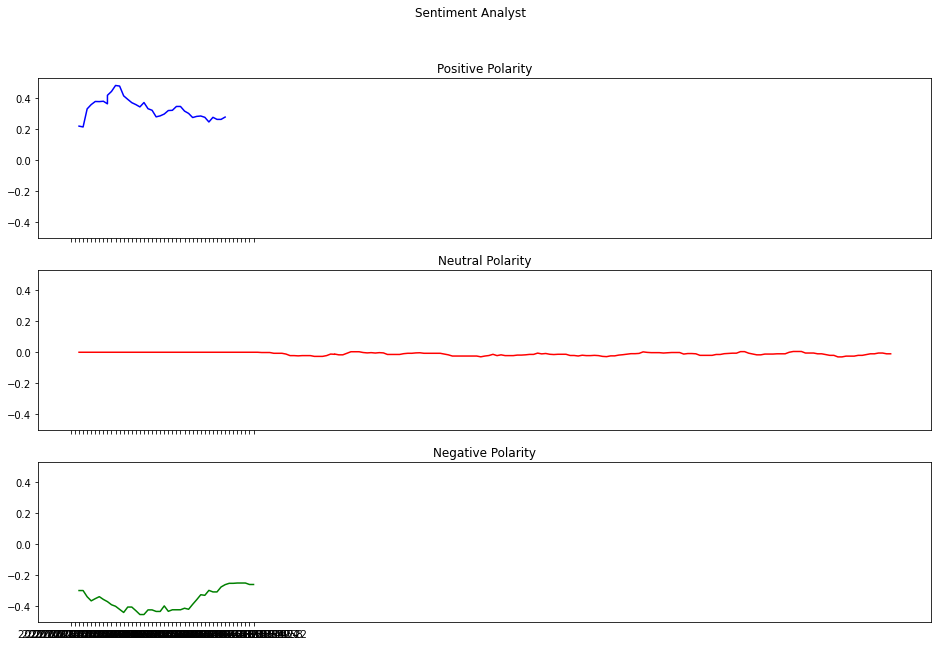

In [34]:
figure = plt.figure(figsize=(16,10))
axis = figure.subplots(nrows=3, ncols=1, sharex=True, sharey=True)

axis[0].plot(positive['TweetAt'], positive['MA Polarity'], color='blue')
axis[0].set_title("\n".join(['Positive Polarity']))

axis[1].plot(neutral['TweetAt'], neutral['MA Polarity'], color='red')
axis[1].set_title("\n".join(['Neutral Polarity']))

axis[2].plot(negative['TweetAt'], negative['MA Polarity'], color='green')
axis[2].set_title("\n".join(['Negative Polarity']))

figure.suptitle("\n".join(['Sentiment Analyst']), y=0.98)
plt.show()

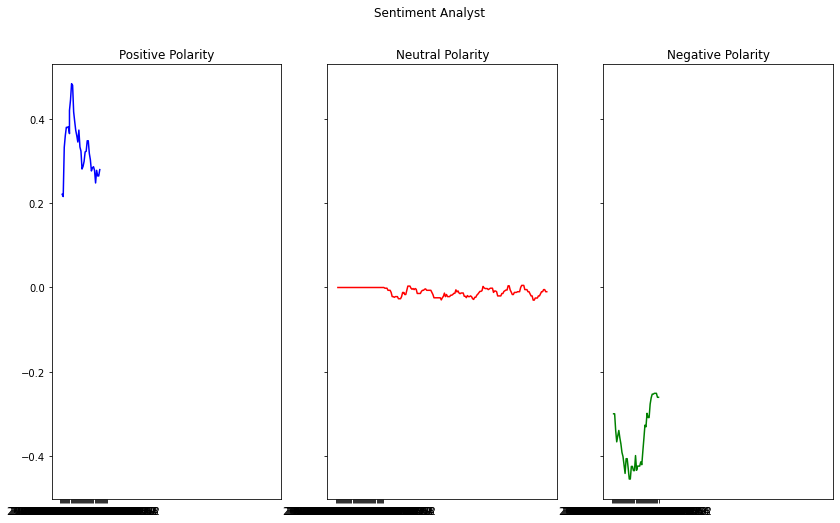

In [35]:
figure = plt.figure(figsize=(14,8))
axis = figure.subplots(nrows=1, ncols=3, sharex=True, sharey=True)

axis[0].plot(positive['TweetAt'], positive['MA Polarity'], color='blue')
axis[0].set_title("\n".join(['Positive Polarity']))

axis[1].plot(neutral['TweetAt'], neutral['MA Polarity'], color='red')
axis[1].set_title("\n".join(['Neutral Polarity']))

axis[2].plot(negative['TweetAt'], negative['MA Polarity'], color='green')
axis[2].set_title("\n".join(['Negative Polarity']))

figure.suptitle("\n".join(['Sentiment Analyst']), y=0.98)
plt.show()